# Visualizing a GIZMO snapshot in DigitalSky

This notebook imports a Gizmo snapshot http://www.tapir.caltech.edu/~phopkins/Site/GIZMO.html from Romeel Dave. This cosmological simulation will be imported with the help of yt http://yt-project.org/ and output into the .speck Partiview format used by DigitalSky

In [2]:
#Python Imports
import yt
from astropy.table import Table

C:\Anaconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
ds = yt.load("C:\Users\msubbarao\projects\DarkMatter\snap_m12.5n128_135.hdf5")

yt : [INFO     ] 2015-09-12 18:06:49,799 Calculating time from 1.000e+00 to be 4.375e+17 seconds
yt : [INFO     ] 2015-09-12 18:06:49,799 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2015-09-12 18:06:49,835 Parameters: current_time              = 4.3748565943e+17 s
yt : [INFO     ] 2015-09-12 18:06:49,835 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2015-09-12 18:06:49,836 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-09-12 18:06:49,838 Parameters: domain_right_edge         = [ 12500.  12500.  12500.]
yt : [INFO     ] 2015-09-12 18:06:49,838 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2015-09-12 18:06:49,838 Parameters: current_redshift          = 4.4408920985e-16
yt : [INFO     ] 2015-09-12 18:06:49,838 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2015-09-12 18:06:49,839 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2015-09-12 18:06:49,839 Parameters: hubble_constant      

In [3]:
ds.parameters

{'BoxSize': 12500.0,
 'Flag_Cooling': 1,
 'Flag_DoublePrecision': 0,
 'Flag_Feedback': 1,
 'Flag_IC_Info': 3,
 'Flag_Metals': 11,
 'Flag_Sfr': 1,
 'Flag_StellarAge': 1,
 'HubbleParam': 0.68000000000000005,
 'MassTable': array([ 0.,  0.,  0.,  0.,  0.,  0.]),
 'Massarr': array([ 0.,  0.,  0.,  0.,  0.,  0.]),
 'NumFiles': 1,
 'NumFilesPerSnapshot': 1,
 'NumPart_ThisFile': array([1973522, 2097152,       0,       0,  124191,       0]),
 'NumPart_Total': array([1973522, 2097152,       0,       0,  124191,       0], dtype=uint32),
 'NumPart_Total_HighWord': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'Omega0': 0.29999999999999999,
 'OmegaLambda': 0.69999999999999996,
 'Redshift': 4.4408920985006262e-16,
 'Time': 0.99999999999999956}

### The Gizmo Simulation Particle types are:

0 = gas  
1 = high-resolution dark matter  
2,3 = 'dummy' collisionless particles (low-res dark-matter particles in cosmological runs; pre-existing "disk" and "bulge" star particles in the non-cosmological runs)  
4 = stars formed during the simulation  
5 = black holes (usually) -- *some* of our runs use this as another reservoir for 'dummy collisionless particles'

So we have 1,973,522 gas particles, 2,097,152 gas particles and 124,191 stars in the simulation


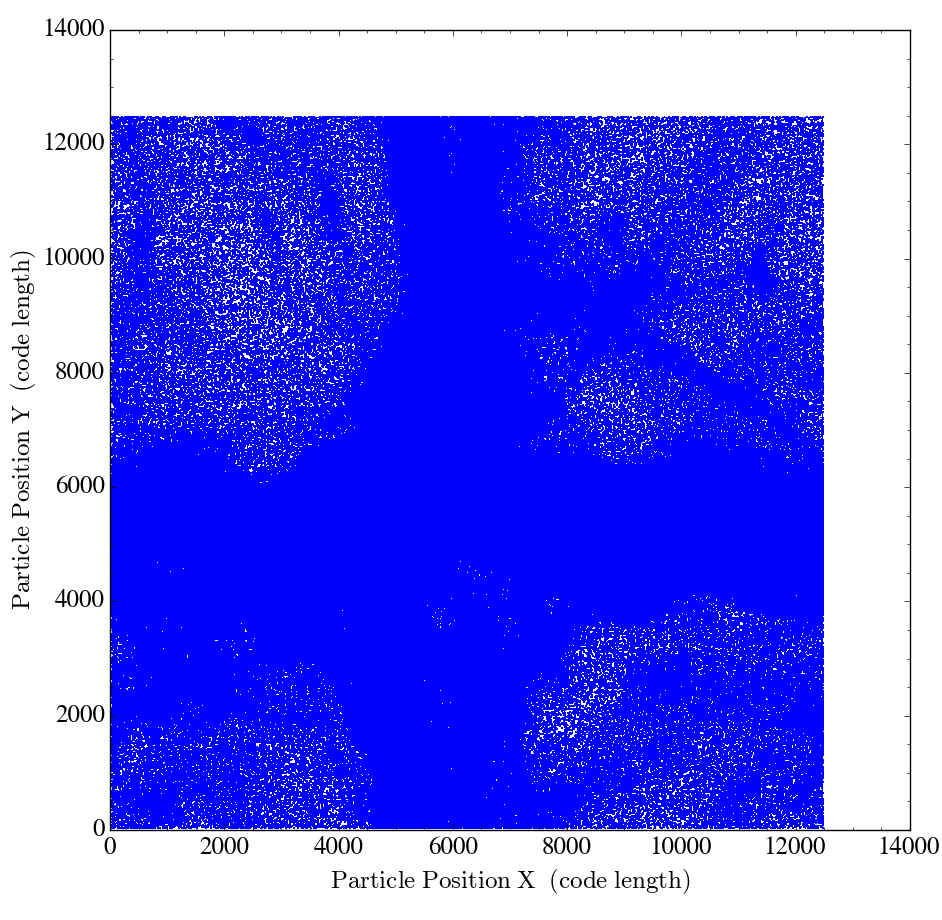

In [15]:
#Gas Particles
yt.ParticlePlot(ds, ('PartType0','particle_position_x'), \
                ('PartType0','particle_position_y'),color='b')


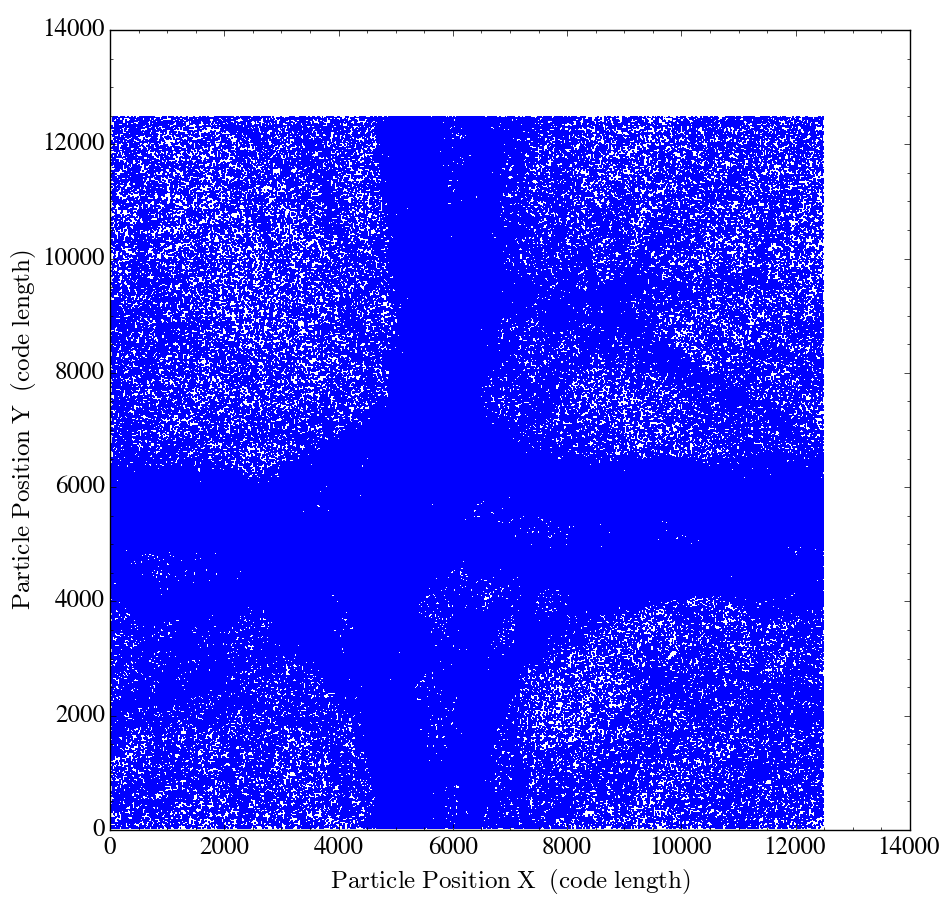

In [11]:
#Dark Matter Particles
yt.ParticlePlot(ds, ('PartType1','particle_position_x'), \
                ('PartType1','particle_position_y'),color='k')


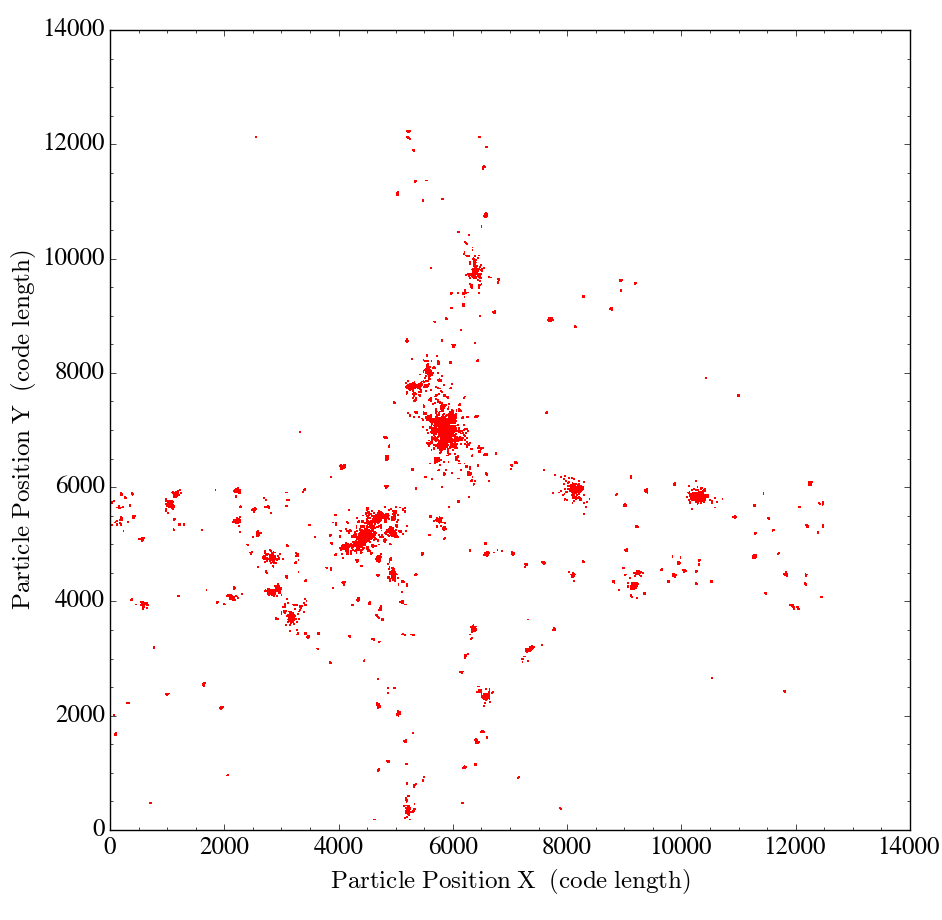

In [14]:
#Star Particles
yt.ParticlePlot(ds, ('PartType4','particle_position_x'), \
                ('PartType4','particle_position_y'), color='r')

yt : [INFO     ] 2015-09-12 18:07:21,559 Allocating for 4.195e+06 particles
yt : [INFO     ] 2015-09-12 18:07:22,368 Identified 2.852e+05 octs
yt : [INFO     ] 2015-09-12 18:07:22,532 Loading field plugins.
yt : [INFO     ] 2015-09-12 18:07:22,532 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-09-12 18:07:22,532 Loaded astro (15 new fields)
yt : [INFO     ] 2015-09-12 18:07:22,533 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-09-12 18:07:22,535 Loaded fluid (63 new fields)
yt : [INFO     ] 2015-09-12 18:07:22,536 Loaded fluid_vector (95 new fields)
yt : [INFO     ] 2015-09-12 18:07:22,536 Loaded geometric (111 new fields)
yt : [INFO     ] 2015-09-12 18:07:22,538 Loaded local (111 new fields)
yt : [INFO     ] 2015-09-12 18:07:22,538 Loaded magnetic_field (119 new fields)
yt : [INFO     ] 2015-09-12 18:07:22,539 Loaded my_plugins (119 new fields)
yt : [INFO     ] 2015-09-12 18:07:22,540 Loaded species (153 new fields)
yt : [INFO     ] 2015-09-12 18:07:27,698 xlim =


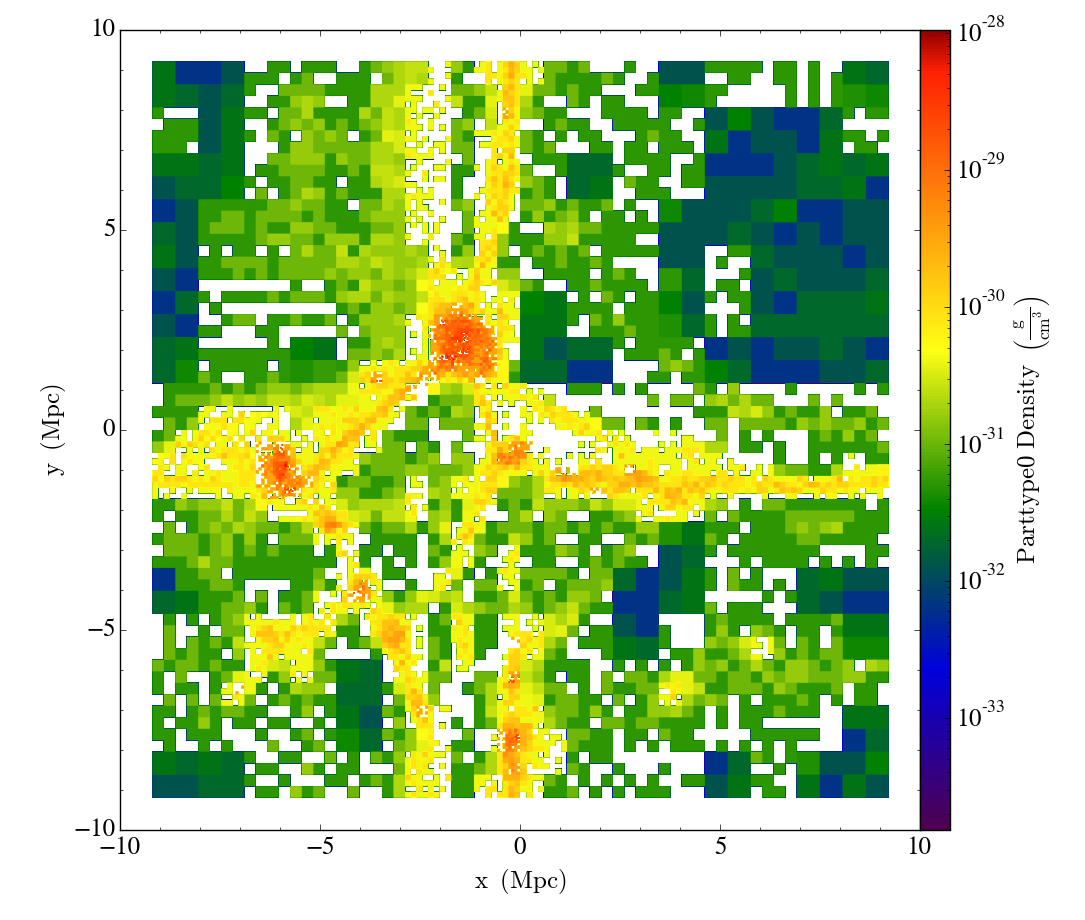

In [4]:
slc = yt.SlicePlot(ds, 2, ('deposit', 'PartType0_density'))
slc.set_width((20, 'Mpc'))

In [51]:
print ds.domain_width.in_units("Mpc")/2.

[ 9.19117647  9.19117647  9.19117647] Mpc


In [5]:
ad = ds.all_data()

## Output Digital Sky Spec Files

In [60]:
Stars = Table([ad['PartType4','particle_position_x'].in_units('Mpc'),\
           ad['PartType4','particle_position_y'].in_units('Mpc'),\
           ad['PartType4','particle_position_z'].in_units('Mpc')], \
           names=('x','y','z'), meta={'name': 'Stars'})
#Create column of 1s to texture
Stars['texture']=1

In [61]:
#Write Stars.speck file 
writeFile = open('Stars.speck','a')
#Define and write the header
headerText="\n\
#Stars from Romeel Dave Cosmo sim\n\
#created for Bloemfontein Workshop Sept 2015\n\
texturevar 0\n\
texture -M 1 halo.sgi\n"
writeFile.write(headerText)
#Write the data
Stars.write(writeFile,format='ascii.no_header')
writeFile.close()

In [16]:
Gas = Table([ad['PartType0','particle_position_x'].in_units('Mpc'),\
           ad['PartType0','particle_position_y'].in_units('Mpc'),\
           ad['PartType0','particle_position_z'].in_units('Mpc')], \
           names=('x','y','z'), meta={'name': 'Gas'})
#Create column of 1s to texture
Gas['texture']=1

In [17]:
#Write Gas.speck file 
writeFile = open('Gas.speck','a')
#Define and write the header
headerText="\n\
#Gas from Romeel Dave Cosmo sim\n\
#created for Bloemfontein Workshop Sept 2015\n\
texturevar 0\n\
texture -M 1 halo.sgi\n"
writeFile.write(headerText)
#Write the data
Gas.write(writeFile,format='ascii.no_header')
writeFile.close()

In [7]:
DarkMatter = Table([ad['PartType1','particle_position_x'].in_units('Mpc'),\
           ad['PartType1','particle_position_y'].in_units('Mpc'),\
           ad['PartType1','particle_position_z'].in_units('Mpc')], \
           names=('x','y','z'), meta={'name': 'Gas'})
#Create column of 1s to texture
Gas['texture']=1

In [8]:
#Write .speck file 
writeFile = open('DarkMatter.speck','a')
#Define and write the header
headerText="\n\
#Gas from Romeel Dave Cosmo sim\n\
#created for Bloemfontein Workshop Sept 2015\n\
texturevar 0\n\
texture -M 1 halo.sgi\n"
writeFile.write(headerText)
#Write the data
DarkMatter.write(writeFile,format='ascii.no_header')
writeFile.close()

In [62]:
Stars

x,y,z,texture
float64,float64,float64,int32
3.11265581916,5.96440968233,4.47058644014,1
3.10864724552,5.96247235466,4.47092249253,1
3.11173131606,5.96276173311,4.46989853803,1
3.11154785156,5.96269351735,4.46986119887,1
3.11210434858,5.96149435604,4.4730623133,1
3.10871151195,5.96137946634,4.47246596392,1
3.11097699334,5.96460858513,4.47269071691,1
3.11214886834,5.96362663718,4.47251586914,1
10.7764698702,4.61848395852,2.34859242159,1
